# Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from src.utils import plot_bar_feature

In [2]:
# Dataset source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
df_raw = pd.read_csv("/home/brenoav/Datasets/adult_income_dataset/income.csv")

In [3]:
print(df_raw.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, - - Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, - Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income (target): >50K, <=50K 

# Checking if some values are NaN

In [4]:
df_raw.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Visualization

## BarPlot

In [5]:
barplot_classes = ["workclass", "education", "marital-status", 
                   "occupation", "relationship", "race", 
                   "gender", "native-country", "income"]

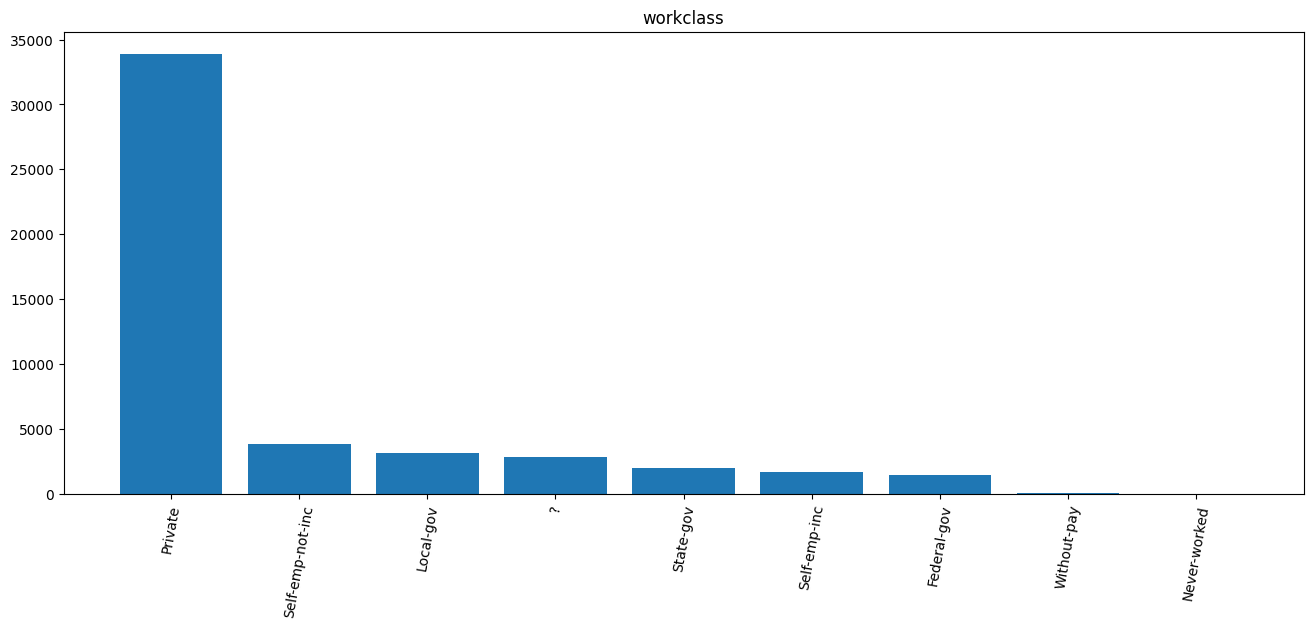

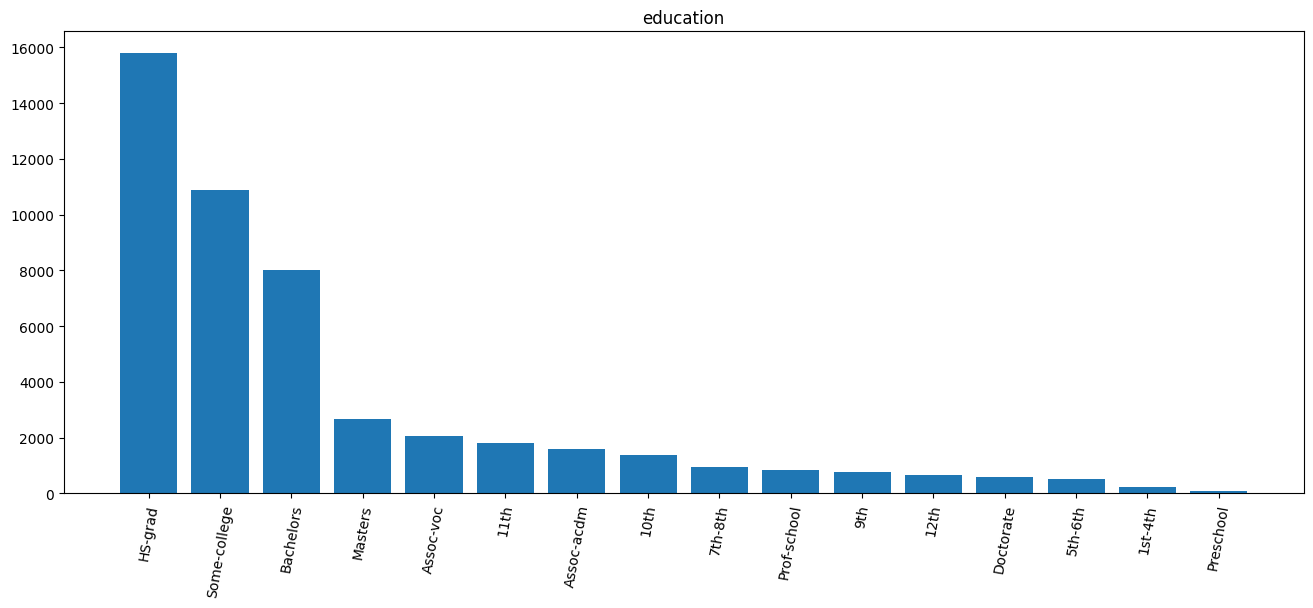

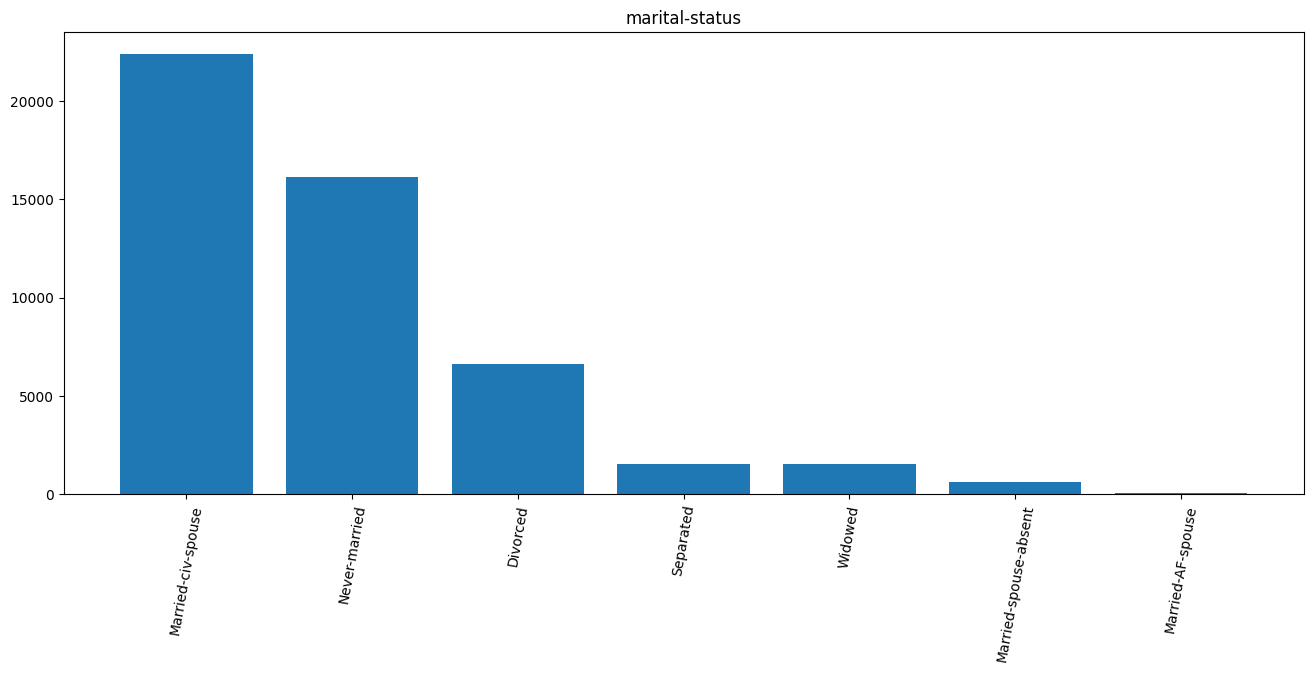

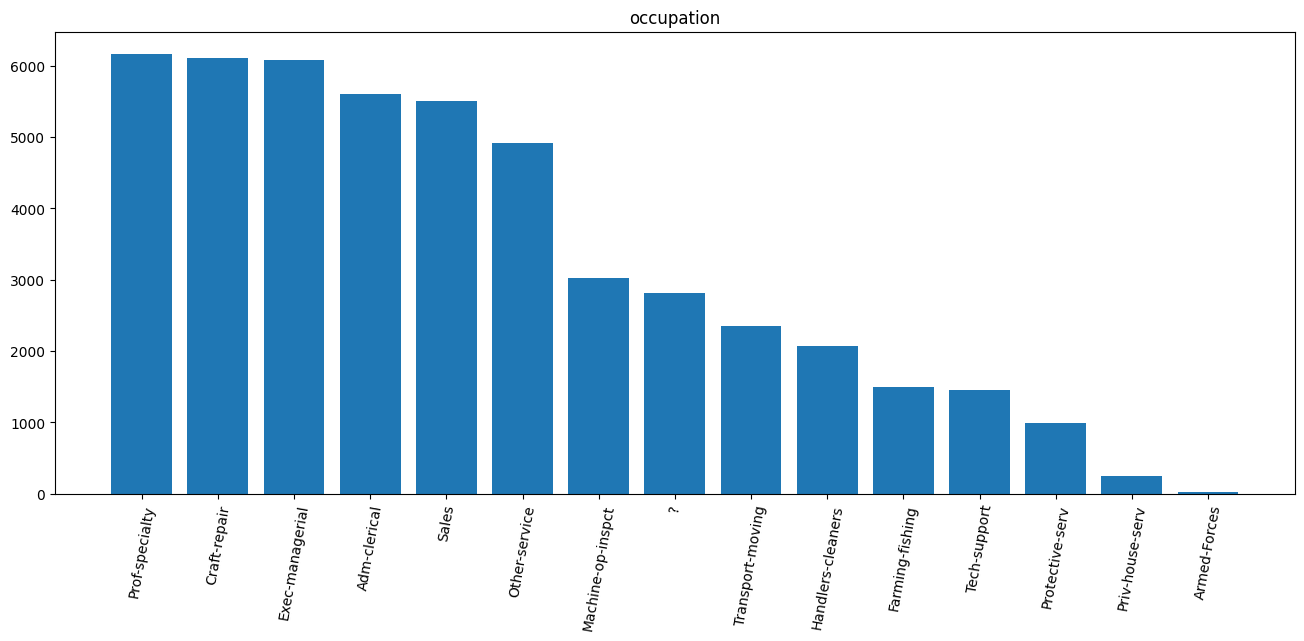

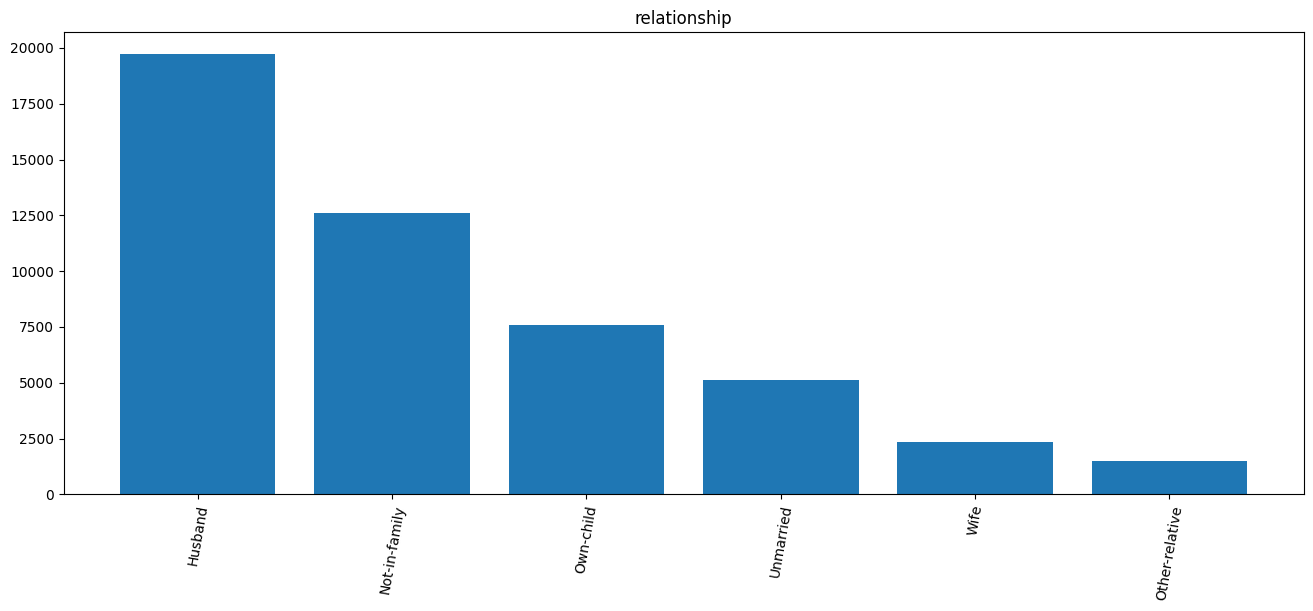

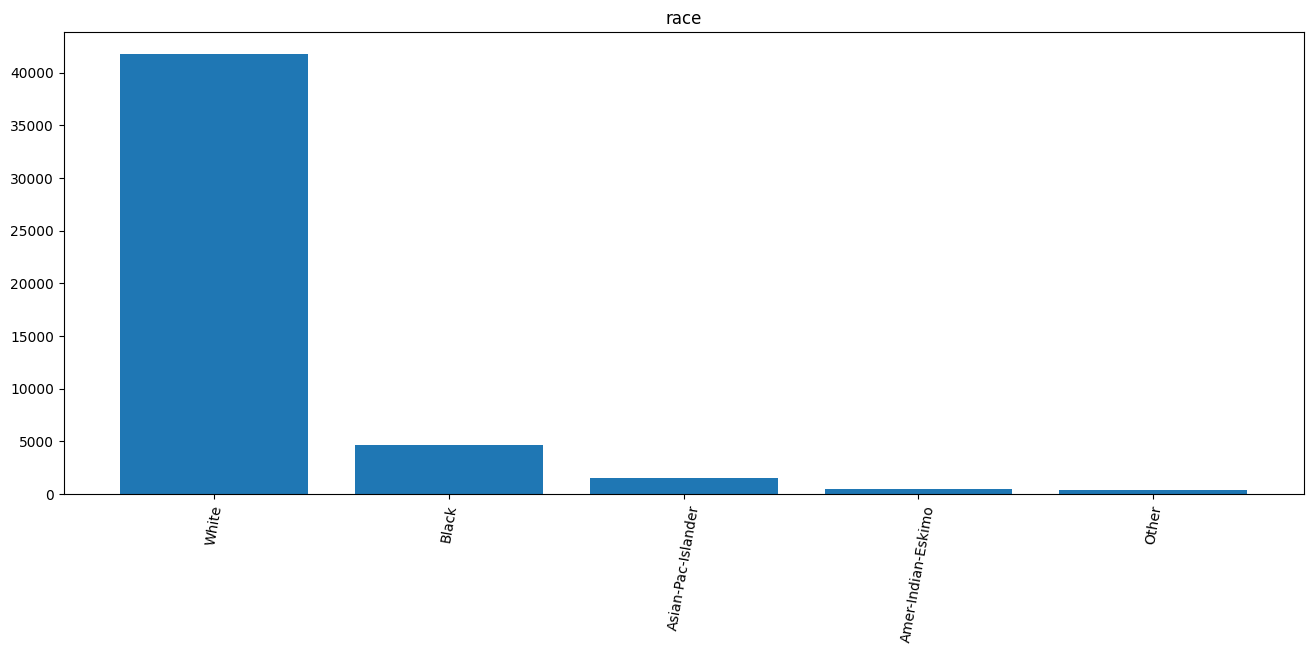

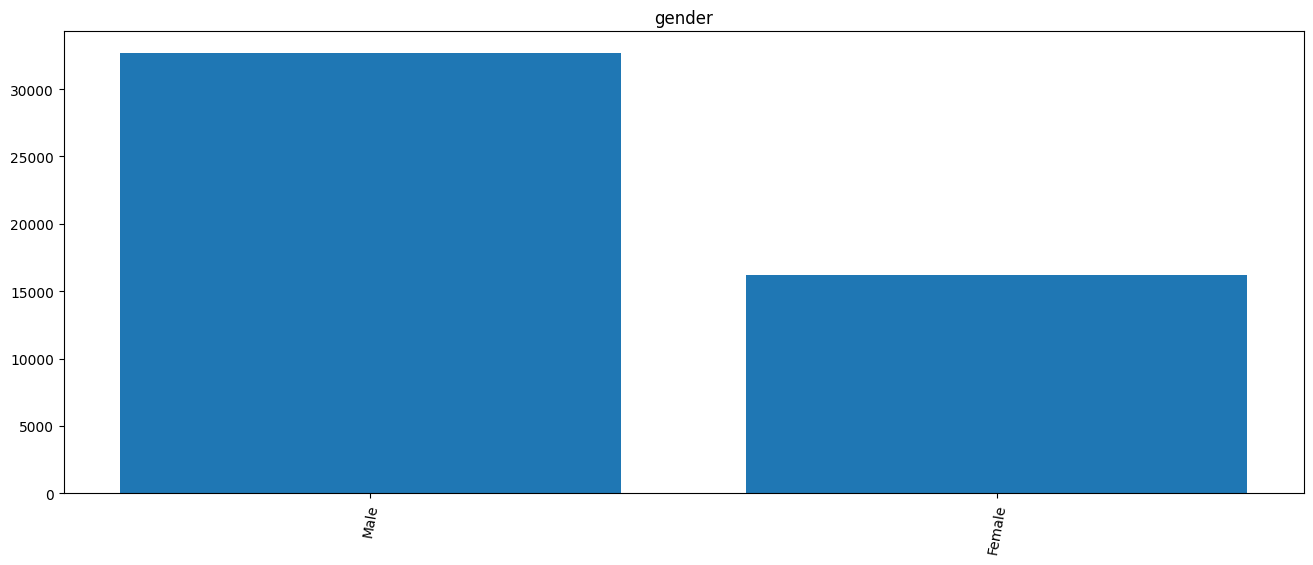

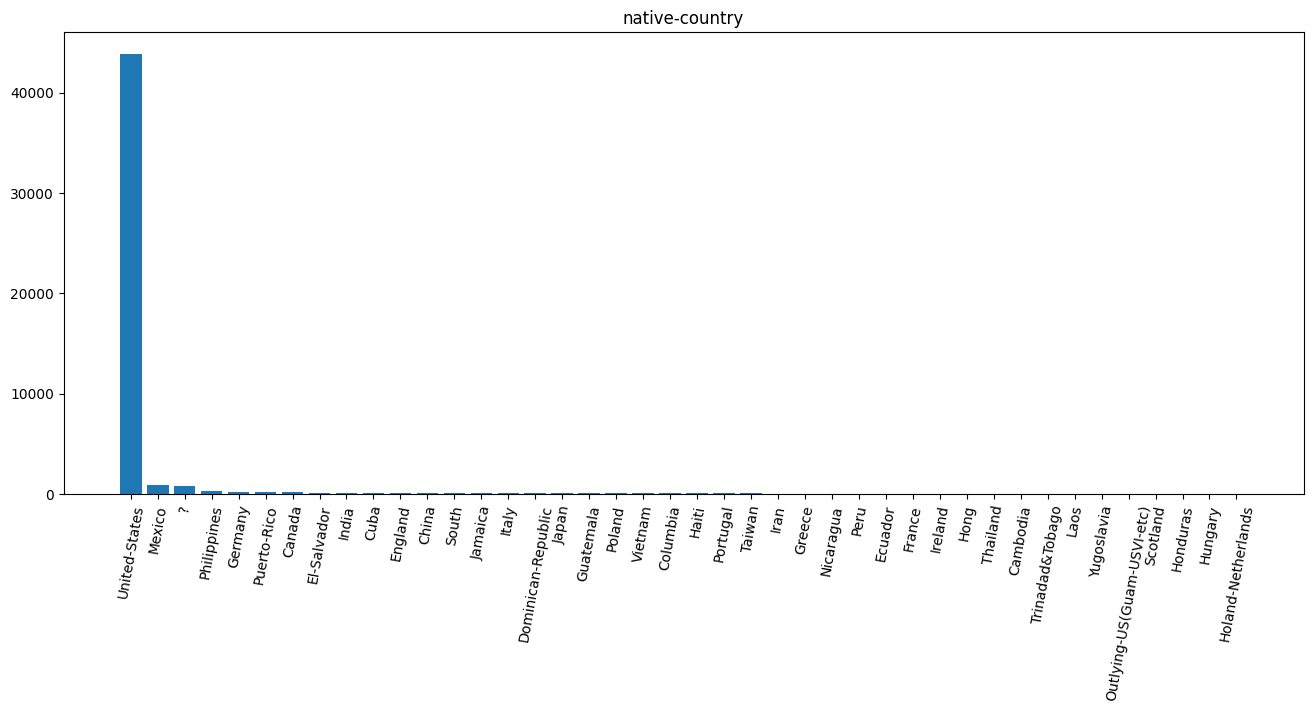

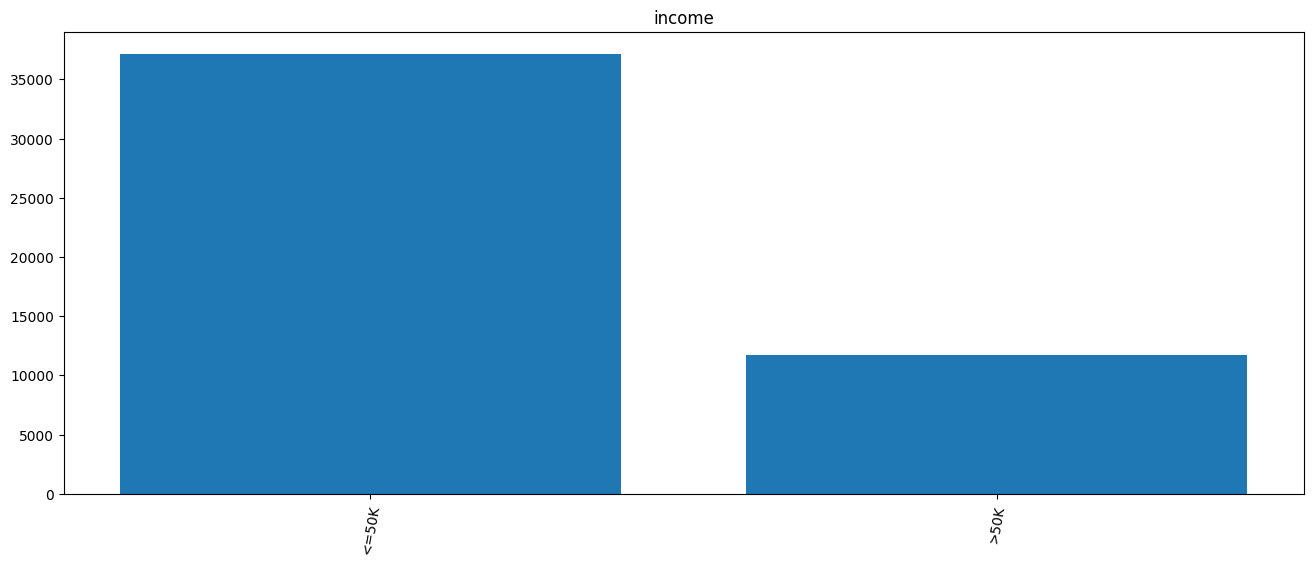

In [6]:
for barplot_class in barplot_classes:
    freq_class = dict(df_raw[barplot_class].value_counts())
    plot_bar_feature(freq_class, title=barplot_class, figsize=(16, 6))

The dataset is unbalanced!

## Removing rows with "?"

In [7]:
lines_before = df_raw.shape[0]

In [8]:
(df_raw == "?").any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

We have "?" on three columns "workclass", "occupation", and "native-country"

In [9]:
df = df_raw.drop(df_raw[df_raw["workclass"] == "?"].index, axis=0)
df = df.drop(df[df["occupation"] == "?"].index, axis=0)
df = df.drop(df[df["native-country"] == "?"].index, axis=0)

In [10]:
lines_after = df.shape[0]

In [11]:
print(f"It was removed {lines_before - lines_after} lines with '?'")

It was removed 3620 lines with '?'


In [12]:
(df == "?").any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

# Transforming categorical into dummies

In [13]:
df = pd.concat([df.drop(columns="workclass"), pd.get_dummies(df["workclass"], prefix="workclass", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="education"), pd.get_dummies(df["education"], prefix="education", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="marital-status"), pd.get_dummies(df["marital-status"], prefix="marital-status", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="occupation"), pd.get_dummies(df["occupation"], prefix="occupation", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="relationship"), pd.get_dummies(df["relationship"], prefix="relationship", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="race"), pd.get_dummies(df["race"], prefix="race", prefix_sep="-", dtype=int)], axis=1)
df = pd.concat([df.drop(columns="native-country"), pd.get_dummies(df["native-country"], prefix="native-country", prefix_sep="-", dtype=int)], axis=1)

# Transforming categorical into binary (0 or 1)

In [14]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [15]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass-Federal-gov,workclass-Local-gov,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,1,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Split dataset

In [35]:
X = df.drop(columns="income")
y = df["income"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.1)

In [40]:
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (40699, 103)
X test: (4523, 103)
y train: (40699,)
y test: (4523,)


# Model Training

In [42]:
f1_scores = []
features = []

num_features_start = X_train.shape[1]

while X_train.shape[1] > 0:
    print(f"Training RandomForest on the {X_train.shape[1]} features")
    
    model = RandomForestClassifier(n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    f1_scores.append(f1)
    features.append(X_test.columns)

    least_important_idx = model.feature_importances_.argmin()

    X_train.drop(X_train.columns[least_important_idx], axis=1, inplace=True)
    X_test.drop(X_test.columns[least_important_idx], axis=1, inplace=True)

Training RandomForest on the 103 features
Training RandomForest on the 102 features
Training RandomForest on the 101 features
Training RandomForest on the 100 features
Training RandomForest on the 99 features
Training RandomForest on the 98 features
Training RandomForest on the 97 features
Training RandomForest on the 96 features
Training RandomForest on the 95 features
Training RandomForest on the 94 features
Training RandomForest on the 93 features
Training RandomForest on the 92 features
Training RandomForest on the 91 features
Training RandomForest on the 90 features
Training RandomForest on the 89 features
Training RandomForest on the 88 features
Training RandomForest on the 87 features
Training RandomForest on the 86 features
Training RandomForest on the 85 features
Training RandomForest on the 84 features
Training RandomForest on the 83 features
Training RandomForest on the 82 features
Training RandomForest on the 81 features
Training RandomForest on the 80 features
Training Ran

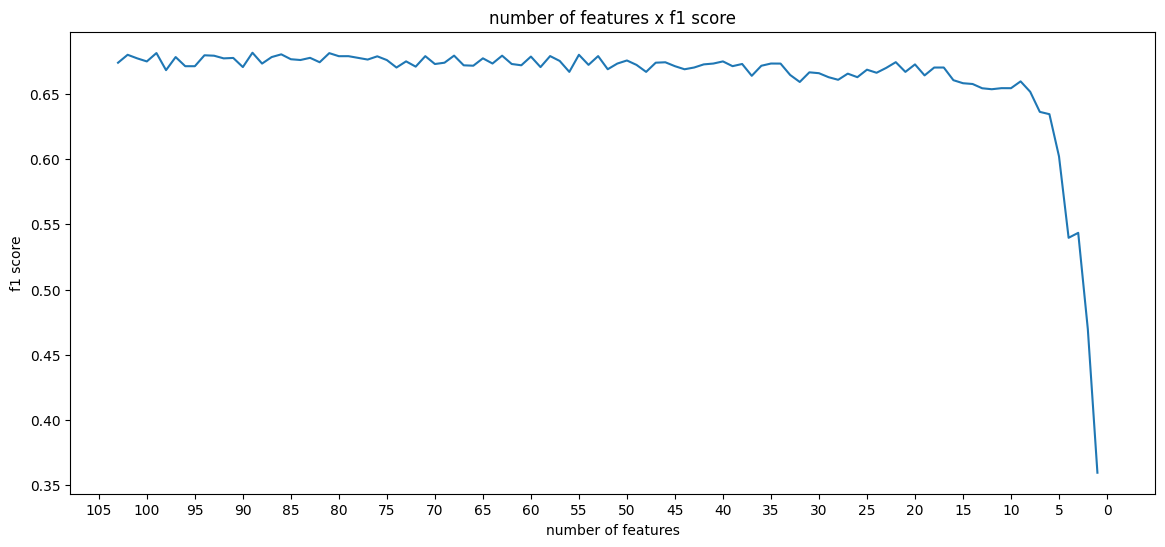

In [44]:
x_axis = range(num_features_start, 0, -1)
plt.figure(figsize=(14, 6))
plt.plot(x_axis, f1_scores)
plt.title("number of features x f1 score")
plt.xlabel("number of features")
plt.ylabel("f1 score")
plt.xlim(num_features_start + 5, - 5)
plt.xticks(range(0, 110, 5))
plt.show()

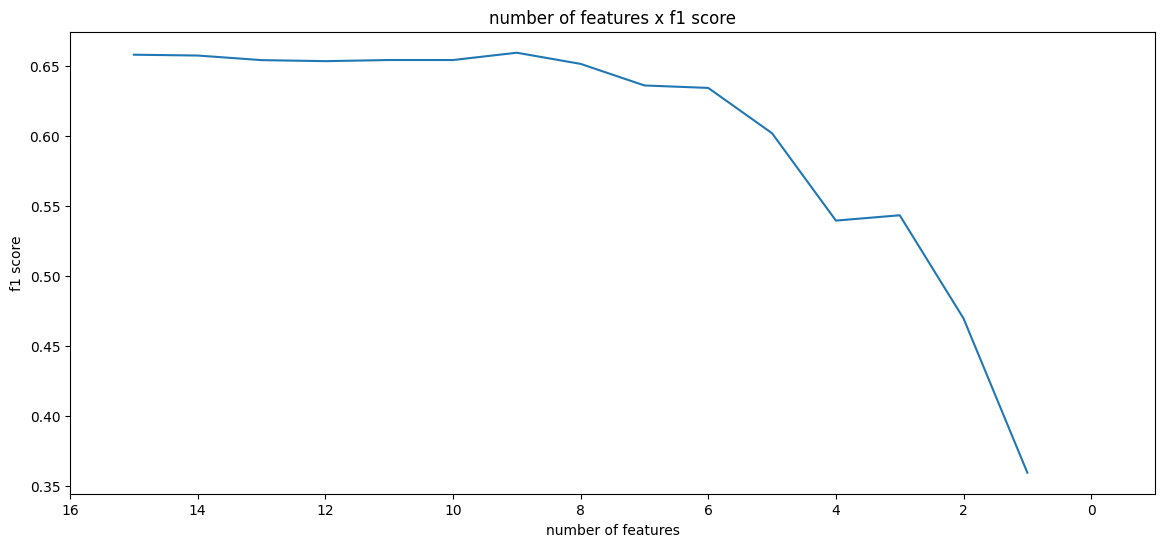

In [48]:
x_axis = range(15, 0, -1)
plt.figure(figsize=(14, 6))
plt.plot(x_axis, f1_scores[-15:])
plt.title("number of features x f1 score")
plt.xlabel("number of features")
plt.ylabel("f1 score")
plt.xlim(16, -1)
#plt.xticks(range(0, 110, 5))
plt.show()

We can use nine features. and the performance is almost the same as with 103 features. 

**Note:** this is not a final approach, of course. We need to visualize  more deeply the features and the target variable more deeply with other graphics. It's just to apply a methodology.

In [54]:
print(f"F1-score 103 features: {f1_scores[0]:.4f}")
print(f"F1-score 8 features: {f1_scores[-8]:.4f}")

F1-score 103 features: 0.6740
F1-score 8 features: 0.6517


In [55]:
print(f"The 8 features that has more contribution are: ")
for feature in features[-8]:
    print(f"\t{feature}")

The 8 features that has more contribution are: 
	age
	fnlwgt
	educational-num
	capital-gain
	capital-loss
	hours-per-week
	marital-status-Married-civ-spouse
	relationship-Husband
